#### Importing required libraries

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download robinreni/signature-verification-dataset

100% 600M/601M [00:16<00:00, 55.8MB/s]
100% 601M/601M [00:16<00:00, 38.9MB/s]


In [ ]:
! unzip signature-verification-dataset.zip

Archive:  signature-verification-dataset.zip
  inflating: sign_data/sign_data/test/049/01_049.png  
  inflating: sign_data/sign_data/test/049/02_049.png  
  inflating: sign_data/sign_data/test/049/03_049.png  
  inflating: sign_data/sign_data/test/049/04_049.png  
  inflating: sign_data/sign_data/test/049/05_049.png  
  inflating: sign_data/sign_data/test/049/06_049.png  
  inflating: sign_data/sign_data/test/049/07_049.png  
  inflating: sign_data/sign_data/test/049/08_049.png  
  inflating: sign_data/sign_data/test/049/09_049.png  
  inflating: sign_data/sign_data/test/049/10_049.png  
  inflating: sign_data/sign_data/test/049/11_049.png  
  inflating: sign_data/sign_data/test/049/12_049.png  
  inflating: sign_data/sign_data/test/049_forg/01_0114049.PNG  
  inflating: sign_data/sign_data/test/049_forg/01_0206049.PNG  
  inflating: sign_data/sign_data/test/049_forg/01_0210049.PNG  
  inflating: sign_data/sign_data/test/049_forg/02_0114049.PNG  
  inflating: sign_data/sign_data/test/0

In [ ]:
!mkdir Train
!mkdir Test
!mkdir Train/Fake
!mkdir Train/Real

!mkdir Test/Fake
!mkdir Test/Real

In [ ]:
import os

In [ ]:
# I'm re-positioning the train data so that keras can read it.
PATH = "sign_data/train/"

for i in os.listdir(PATH):
    
    contol = i.split("_")
    
    try:
    
        if contol[1]=="forg":
            
            os.system("cp -r {} Train/Fake".format(PATH+i))
            
    except:
        
        os.system("cp -r {} Train/Real".format(PATH+i))

In [ ]:
PATH = "sign_data/test/"

for i in os.listdir(PATH):
    
    contol = i.split("_")
    
    try:
    
        if contol[1]=="forg":
            
            os.system("cp -r {} Test/Fake".format(PATH+i))
            
    except:
        
        os.system("cp -r {} Test/Real".format(PATH+i))

In [ ]:
# Dataset locations
train_dir = os.path.join("Train/") 
test_dir = os.path.join("Test/") 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

The images in data should should be resized to mentioned width and height as now we are proceeding to use another model. 

In [ ]:
SIZE = 224

#### Training Dataset

In [ ]:
# loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'sign_data/train/',
    image_size=(224, 224)
)

Found 1649 files belonging to 128 classes.


#### Testing Dataset

In [ ]:
# loading training data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'sign_data/test/',
    seed=42,
    image_size=(224, 224)
)

Found 500 files belonging to 42 classes.


#### Images
We have following images in training data.

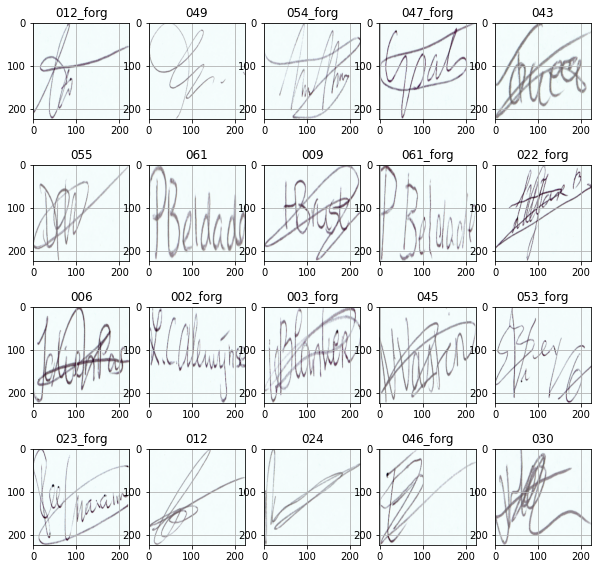

In [ ]:
class_names = training_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # print(images[i])
        plt.title(class_names[labels[i]])
        plt.grid(True)

These are the images in testing data.

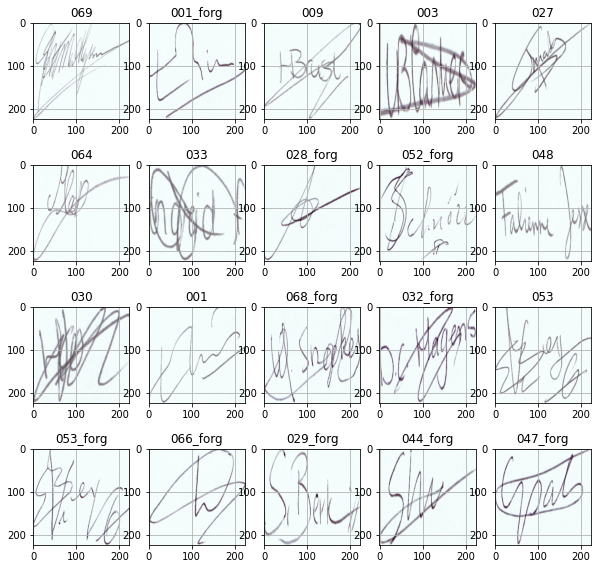

In [ ]:
class_names = training_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # print(images[i])
        plt.title(class_names[labels[i]])
        plt.grid(True)

#### Savind image data in numpy array

In [ ]:
import cv2
import os
import glob

train_data = []
train_labels = []

for per in os.listdir('sign_data/train/'):
    for data in glob.glob('sign_data/train/' +per+'/*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))
train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data
test_data = []
test_labels = []
for per in os.listdir('sign_data/test/'):
    for data in glob.glob('sign_data/test/' +per+'/*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))
test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)
print(train_labels)

[1 1 1 ... 1 1 1]


In [ ]:
print(train_dir)

Train/


In [ ]:
! pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


For use of categorical entropy loss we need to configure data. 

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)

#### Shapes of numpy array made above.

In [ ]:
train_data.shape

(1649, 1, 224, 224, 3)

In [ ]:
train_data = train_data.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)

In [ ]:
train_data.shape

(1649, 224, 224, 3)

In [ ]:
train_labels.shape

(1649, 2)

#### Shuffling

In [ ]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)

#### Importing base model  (VGG-19)

In [ ]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

base_model =tf.keras.applications.vgg19.VGG19(
    include_top= False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
)
base_model.summary()



Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### Our model
Here we are freezing first 5 layers og VGG-19 and adding top layers.

In [ ]:
i=0
while i != 5:
    base_model.layers[i].trainable = False
    i+=1
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(2, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#### Training our model

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]

progess = model.fit(train_data,train_labels, batch_size=32, callbacks=early_stop, epochs=100,validation_split=.25)

Epoch 1/100
39/39 [==============================] - 17s 436ms/step - loss: 5.7869e-09 - accuracy: 1.0000 - val_loss: 0.0932 - val_accuracy: 0.9879
Epoch 2/100
39/39 [==============================] - 17s 443ms/step - loss: 5.5940e-09 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9879
Epoch 3/100
39/39 [==============================] - 17s 445ms/step - loss: 5.1117e-09 - accuracy: 1.0000 - val_loss: 0.0939 - val_accuracy: 0.9879
Epoch 4/100
39/39 [==============================] - 17s 443ms/step - loss: 4.7259e-09 - accuracy: 1.0000 - val_loss: 0.0942 - val_accuracy: 0.9879
Epoch 4: early stopping


#### Accuracy plot.

<Figure size 432x288 with 0 Axes>

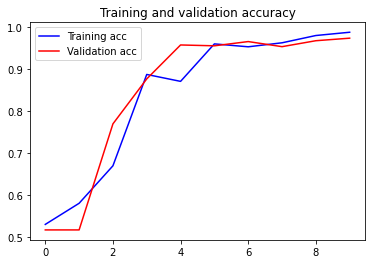

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

#### Loss plot.

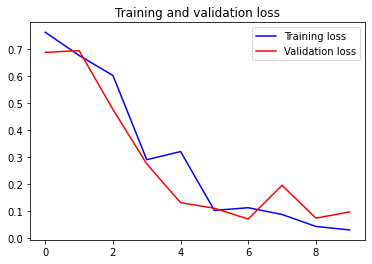

In [ ]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

#### Accuracy Score.

In [ ]:
pred = model.predict(test_data)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score

yt = np.argmax(pred,axis=1)

print(f"Accuracy Score: {accuracy_score(yt, test_labels)}")
print(f"Confusion Matrix: \n {confusion_matrix( test_labels, yt)}")
#confusion_matrix( test_labels, yt)
print(f"Precision: {precision_score(test_labels, yt)}")


print(f"Recall: {recall_score(test_labels,yt)}")



Accuracy Score: 0.988
Confusion Matrix: 
 [[252   0]
 [  6 242]]
Precision: 1.0
Recall: 0.9758064516129032
